# 4 Convolutional Neural Networks - image segmentation (TensorFlow)

## 4.1 Image and Label Data
**WARNING:** This file is not currently compatible with Google Colab due to accessing large files. The interested can look into [Colab IO][colab_io], e.g.:
```python
from google.colab import files
files.upload()
```
This also means that TensorFlow needs to be [installed locally][tf_install] to run this file. Alternatively, Anaconda can also [work with TensorFlow][tf_conda].

The images and labels (segmentations) in [PROMISE12][promise12] are used here. Resampled data can be downloaded here:

[Download Data][data_link]

Then, unzip the zip file to individual npy files by running the following python script [*unzip_files*][unzip_files.py]. By default, the script is looking the downloaded zip file in Downloads folder under user home directory and save all the unzipped files in data folder under working directory.

On Linux:
```console
python3 ./data/unzip_files.py 
```

Or:

[colab_io]: https://colab.research.google.com/notebooks/io.ipynb
[tf_install]: https://www.tensorflow.org/install/
[tf_conda]: https://www.anaconda.com/blog/developer-blog/tensorflow-in-anaconda/
[promise12]: https://promise12.grand-challenge.org/
[data_link]: https://github.com/YipengHu/example-data/raw/master/promise12/data.zip
[unzip_files.py]: ./data/unzip_files.py

In [1]:
import data.unzip_files as unzipfiles
import os


# this is where the zip file and the output folder need to be specified
path_to_zip_file = "~/Downloads/data.zip"
path_to_output_folder = "./data"

path_to_data = unzipfiles.simple_unzip(path_to_zip_file)

Data unzipped successfully at: /home/yipenghu/git/ipmi/tutorials/data


The output folder shoud have all the data needed. For those who are interested, the script [*script_promise12*][script_promise12.py] contains code that resampled the original raw data.

Additionally, a package contains several simple utility functions. The [*utilities*][utilities.py] module is in the same github repository. 

Now, check a few images and labels in the folder:

[script_promise12.py]: ./data/script_promise12.py
[utilities.py]: ./utilities.py

(23, 205, 205)
(23, 205, 205)


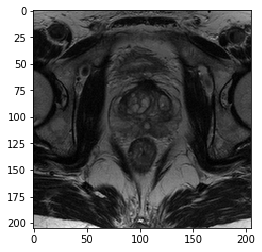

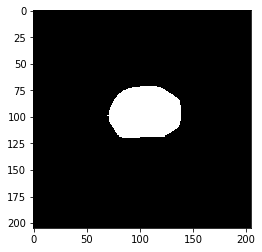

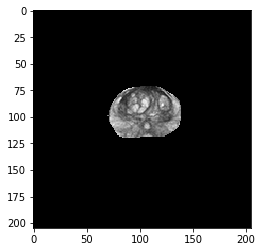

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# load a training image-label pair
idx = 30
image = np.load(os.path.join(path_to_data, "image_train%02d.npy" % idx))
label = np.load(os.path.join(path_to_data, "label_train%02d.npy" % idx))
print(image.shape)
print(label.shape)

# plot the pair
idx_slice = 12
plt.figure()
plt.imshow(image[idx_slice,:,:], cmap='gray')
plt.figure()
plt.imshow(label[idx_slice,:,:], cmap='gray')

# and check to see if the mask is actually segmenting the ROI
plt.figure()
plt.imshow(image[idx_slice,:,:] * label[idx_slice,:,:], cmap='gray')

## 4.2 Computation Graph for a Fully Convolutional Neural Network
The following script is not optimised for performace or best coding practice. This illustrates a basic working workflow to do image segmentation.

In [5]:
import tensorflow as tf


# First define placeholders with fixed sizes
size_input = [32, 96, 96]
size_minibatch = 16
ph_image = tf.placeholder(tf.float32, [size_minibatch]+size_input+[1])
ph_label = tf.placeholder(tf.float32, [size_minibatch]+size_input+[1])

# the first block of layers: 
# -1- declare variables as weights to optimise
# -2- layers include nonlinear activation (relu), convolution and batch normalisation
